### **Q1) 	For SAT dataset show the outliers using z-score and modifier z-score.**

In [1]:
import sys
import scipy
import scipy.stats as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random

Matplotlib is building the font cache; this may take a moment.


In [17]:
ct_test = pd.read_csv('datasetForExp4.csv') 
print(ct_test.shape)
ct_test.head()

(10998, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,NaN,17:24:00,4.216,0.418,234.84,18.400,0.000,1.000,17.0
1,NaN,17:25:00,5.360,0.436,233.63,23.000,0.000,1.000,16.0
2,NaN,17:26:00,5.374,0.498,233.29,23.000,0.000,2.000,17.0
3,NaN,17:27:00,5.388,0.502,233.74,23.000,0.000,1.000,17.0
4,NaN,17:28:00,3.666,0.528,235.68,15.800,0.000,1.000,17.0


In [18]:
ct_test = ct_test.dropna(subset=['Voltage'])

mean_rate = ct_test['Voltage'].mean()

stdev_rate = ct_test['Voltage'].std(ddof=0)

In [25]:
print('Mean Voltage is {:.3f}'.format(mean_rate))
print('Standard deviation is {:.3f}'.format(stdev_rate))

Mean Voltage is 241.068
Standard deviation is 3.701


Calculate the z-score and add the result to the dataframe.

In [26]:
zscore_rate = ss.zscore(ct_test['Voltage'], ddof=0)
ct_test = ct_test.assign(zscore=zscore_rate)
ct_test.head(8)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Voltage_normalized,zscore
0,NaN,17:24:00,4.216,0.418,234.84,18.400,0.000,1.000,17.0,-1.682597,-1.682597
1,NaN,17:25:00,5.360,0.436,233.63,23.000,0.000,1.000,16.0,-2.009509,-2.009509
2,NaN,17:26:00,5.374,0.498,233.29,23.000,0.000,2.000,17.0,-2.101369,-2.101369
3,NaN,17:27:00,5.388,0.502,233.74,23.000,0.000,1.000,17.0,-1.979790,-1.979790
4,NaN,17:28:00,3.666,0.528,235.68,15.800,0.000,1.000,17.0,-1.455650,-1.455650
5,NaN,17:29:00,3.520,0.522,235.02,15.000,0.000,2.000,17.0,-1.633966,-1.633966
6,NaN,17:30:00,3.702,0.520,235.09,15.800,0.000,1.000,17.0,-1.615054,-1.615054
7,NaN,17:31:00,3.700,0.520,235.22,15.800,0.000,1.000,17.0,-1.579931,-1.579931


Now identify the anomalies and plot the results.

In [27]:
def plot_anomaly(score_data, threshold):
    # Mask to plot values above and below threshold in different colors
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outlier = (score_data < threshold)
    
    
    plt.figure(dpi=150)
    plt.plot(ranks[~mask_outlier], score_data[~mask_outlier],'o', color='b',label='OK Voltage')
    plt.plot(ranks[mask_outlier], score_data[mask_outlier],'o', color='r', label='anomalies')
    plt.axhline(threshold,color='r',label='threshold', alpha=0.5)
    plt.legend(loc = 'lower left')
    plt.title('Z-score vs. Voltage', fontweight='bold')
    plt.xlabel('Voltage')
    plt.ylabel('Z-score')
    plt.show()

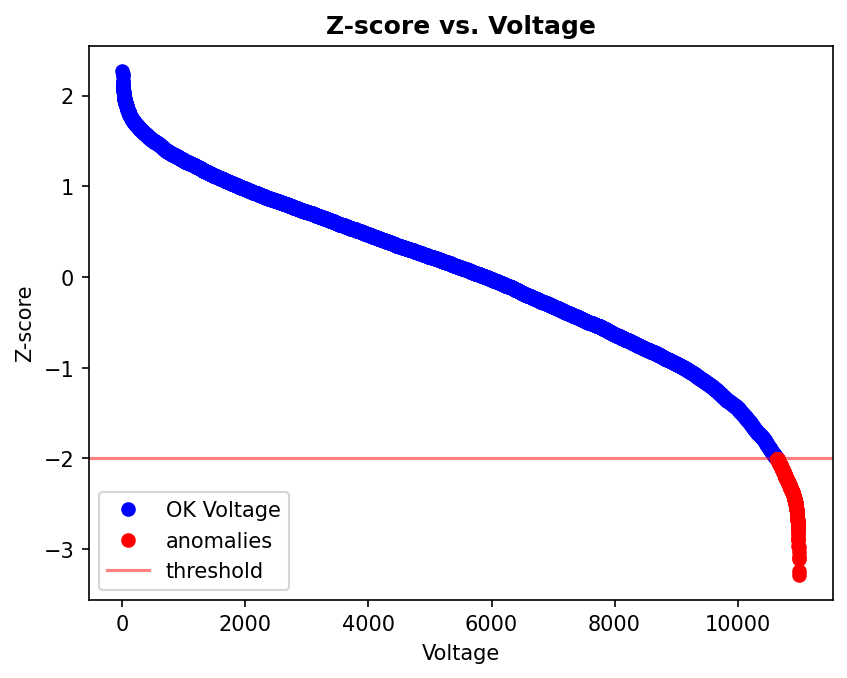

In [28]:
plot_anomaly(ct_test['zscore'], -2)

In [29]:
zscore_anomalies = ct_test[(ct_test['zscore'] < -2)]
zscore_anomalies

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Voltage_normalized,zscore
1,NaN,17:25:00,5.360,0.436,233.63,23.000,0.000,1.000,16.0,-2.009509,-2.009509
2,NaN,17:26:00,5.374,0.498,233.29,23.000,0.000,2.000,17.0,-2.101369,-2.101369
10,NaN,17:34:00,4.448,0.498,232.86,19.600,0.000,1.000,17.0,-2.217544,-2.217544
11,NaN,17:35:00,5.412,0.470,232.78,23.200,0.000,1.000,17.0,-2.239158,-2.239158
12,NaN,17:36:00,5.224,0.478,232.99,22.400,0.000,1.000,16.0,-2.182421,-2.182421
...,...,...,...,...,...,...,...,...,...,...,...
10104,NaN,17:48:00,7.054,0.352,233.11,30.200,37.000,1.000,16.0,-2.150000,-2.150000
10105,NaN,17:49:00,6.926,0.240,232.07,29.800,36.000,0.000,17.0,-2.430982,-2.430982
10106,NaN,17:50:00,6.934,0.234,232.20,29.800,36.000,0.000,16.0,-2.395860,-2.395860
10107,NaN,17:51:00,7.006,0.238,233.14,30.000,36.000,0.000,17.0,-2.141895,-2.141895


We have found our anomalies, but we still have one thing to do: check our assumption that the data can be modeled approximately as a normal distribution. If this is the case, then we have completed our test. If it isn't, then we cannot connect the z-score with probabilities as we did earlier in this notebook.
First, let's bin the data and see what it looks like as a histogram.

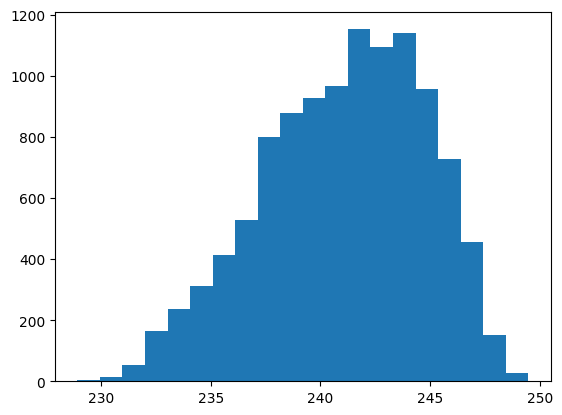

In [32]:
nbins= 20
n_hist, bins_hist, patches_hist = plt.hist(ct_test['Voltage'],nbins,density=False,cumulative=False, linewidth=1.0, label='data')

In [37]:
def modified_zscore(data, consistency_correction=1.4826):
    """
    Returns the modified z score and Median Absolute Deviation (MAD) from the scores in data.
    The consistency_correction factor converts the MAD to the standard deviation for a given
    distribution. The default value (1.4826) is the conversion factor if the underlying data
    is normally distributed
    """
    median = np.median(data)
    
    deviation_from_med = np.array(data) - median

    mad = np.median(np.abs(deviation_from_med))
    mod_zscore = deviation_from_med/(consistency_correction*mad)
    return mod_zscore, mad

In [38]:
mad_zscore, mad_participation = modified_zscore(ct_test['Voltage'])
z_sc_participation = ct_test.assign(zscore_median=mad_zscore)

In [39]:
mod_zscore_anomalies = z_sc_participation[(z_sc_participation['zscore_median'] < -2)]
mod_zscore_anomalies

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Voltage_normalized,zscore,zscore_median
2,NaN,17:26:00,5.374,0.498,233.29,23.000,0.000,2.000,17.0,-2.101369,-2.101369,-2.023472
10,NaN,17:34:00,4.448,0.498,232.86,19.600,0.000,1.000,17.0,-2.217544,-2.217544,-2.130101
11,NaN,17:35:00,5.412,0.470,232.78,23.200,0.000,1.000,17.0,-2.239158,-2.239158,-2.149939
12,NaN,17:36:00,5.224,0.478,232.99,22.400,0.000,1.000,16.0,-2.182421,-2.182421,-2.097865
13,NaN,17:37:00,5.268,0.398,232.91,22.600,0.000,2.000,17.0,-2.204035,-2.204035,-2.117703
...,...,...,...,...,...,...,...,...,...,...,...,...
10104,NaN,17:48:00,7.054,0.352,233.11,30.200,37.000,1.000,16.0,-2.150000,-2.150000,-2.068108
10105,NaN,17:49:00,6.926,0.240,232.07,29.800,36.000,0.000,17.0,-2.430982,-2.430982,-2.326001
10106,NaN,17:50:00,6.934,0.234,232.20,29.800,36.000,0.000,16.0,-2.395860,-2.395860,-2.293765
10107,NaN,17:51:00,7.006,0.238,233.14,30.000,36.000,0.000,17.0,-2.141895,-2.141895,-2.060668


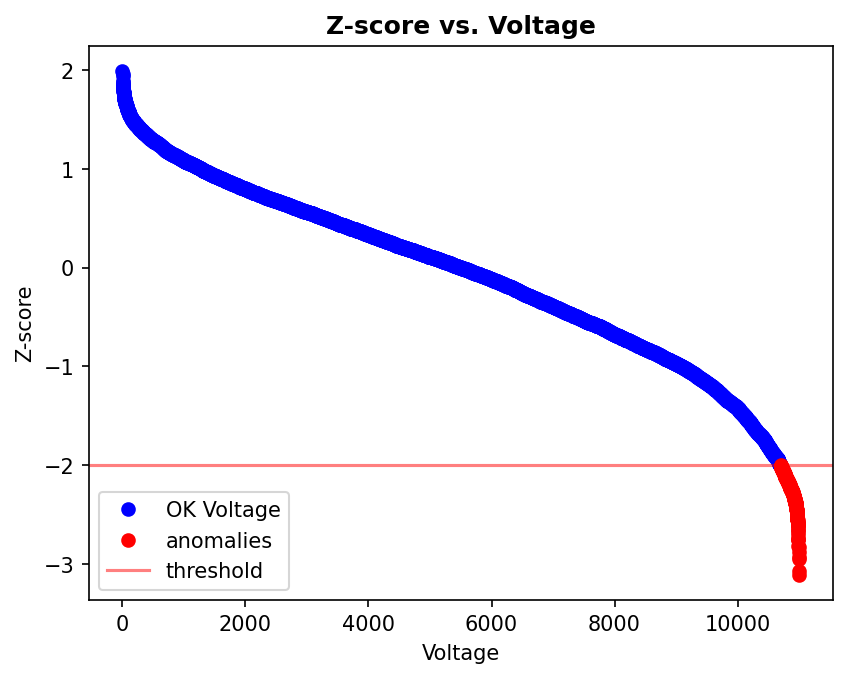

In [44]:
plot_anomaly(z_sc_participation['zscore_median'], -2)

In [45]:
z_sc_participation['zscore_median'].describe()

count    10996.000000
mean        -0.094775
std          0.917871
min         -3.109601
25%         -0.743924
50%          0.000000
75%          0.619936
max          1.991236
Name: zscore_median, dtype: float64

In [46]:
z_sc_participation['zscore'].describe()
print('Number of NaN values in Voltage:', ct_test['Voltage'].isna().sum())

Number of NaN values in Voltage: 0


### **Q2) For Football data show the outliers using z-score and modifier z-score.**

In [66]:
# First row is a header row, but the header names are cumbersome. 
# Skip first row and manually label
# Encoding ensures that accents in sames are rendered properly 
top_goals = pd.read_csv('datasetForExp4.csv')
top_goals = top_goals.dropna(subset=["Voltage"])               
print('Number of NaN values in Voltage:', top_goals['Voltage'].isna().sum())

Number of NaN values in Voltage: 0


Once again will start by using the z-score to identify anomalies. As we are interested in the superstars, this time we will have an upper threshold. We choose  z=+2
 . Above this z-score, any player will be labeled as an anomaly.
As before, we calculate the mean and standard deviation.

In [68]:
mean_goals = top_goals['Voltage'].mean()
stdev_goals = top_goals['Voltage'].std(ddof=0)
print('Mean number of Voltage is {:.2f}'.format(mean_goals))
print('Standard deviation is {:.2f}'.format(stdev_goals))
print('Number of NaN values in Voltage:', top_goals['Voltage'].isna().sum())

Mean number of Voltage is 241.07
Standard deviation is 3.70
Number of NaN values in Voltage: 0


Calculate the z-score for each player and add the result to the dataframe.

In [69]:
print('Number of NaN values in Voltage:', top_goals['Voltage'].isna().sum())
# top_goals['Voltage'].fillna(2, inplace=True)
zscore_goals = ss.zscore(top_goals['Voltage'], ddof=0)
top_goals = top_goals.assign(zscore=zscore_goals)
top_goals.head(21)

Number of NaN values in Voltage: 0


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,zscore
0,NaN,17:24:00,4.216,0.418,234.84,18.400,0.000,1.000,17.0,-1.682597
1,NaN,17:25:00,5.360,0.436,233.63,23.000,0.000,1.000,16.0,-2.009509
2,NaN,17:26:00,5.374,0.498,233.29,23.000,0.000,2.000,17.0,-2.101369
3,NaN,17:27:00,5.388,0.502,233.74,23.000,0.000,1.000,17.0,-1.979790
4,NaN,17:28:00,3.666,0.528,235.68,15.800,0.000,1.000,17.0,-1.455650
5,NaN,17:29:00,3.520,0.522,235.02,15.000,0.000,2.000,17.0,-1.633966
6,NaN,17:30:00,3.702,0.520,235.09,15.800,0.000,1.000,17.0,-1.615054
7,NaN,17:31:00,3.700,0.520,235.22,15.800,0.000,1.000,17.0,-1.579931
8,NaN,17:32:00,3.668,0.510,233.99,15.800,0.000,1.000,17.0,-1.912246
9,NaN,17:33:00,3.662,0.510,233.86,15.800,0.000,2.000,16.0,-1.947369


Now, modify the previous plotting function to display the results.

In [70]:
def plot_anomaly_goals(score_data, threshold):
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outlier = (score_data > threshold)
    
    plt.figure(dpi=150)
    plt.plot(ranks[mask_outlier], score_data[mask_outlier], 'o', color='r', label='anomalies')
    plt.plot(ranks[~mask_outlier], score_data[~mask_outlier], 'o', color='b', label='typical player')
    plt.axhline(threshold,color='r', label='threshold', alpha=0.5)
    plt.legend(loc='upper right')
    plt.title('Z-score vs. player', fontweight='bold')
    plt.xticks(np.arange(0, 21, step=2.0))
    plt.xlabel('Player Rank')
    plt.ylabel('Z-score')
    plt.show()

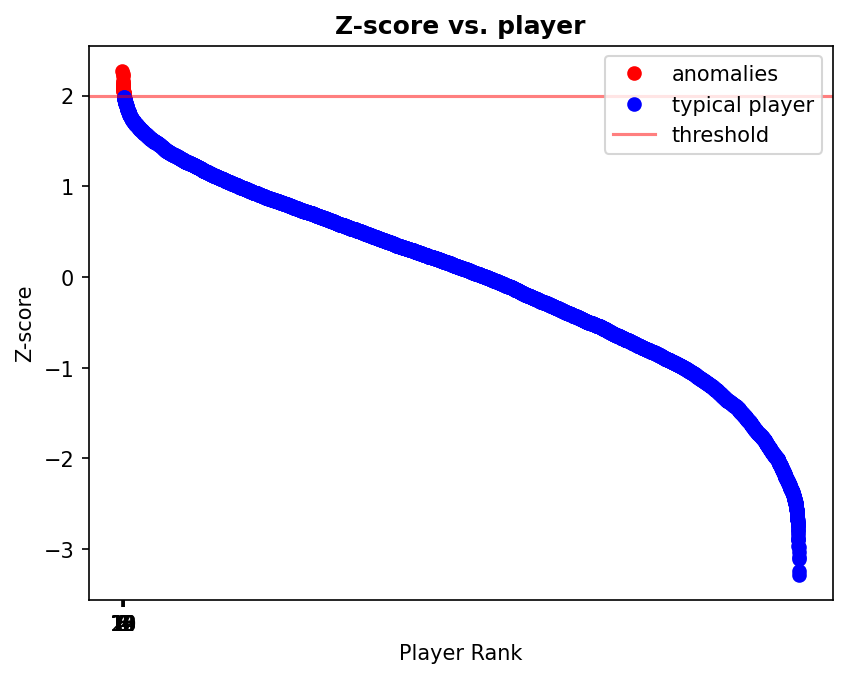

In [71]:
plot_anomaly_goals(top_goals['zscore'], 2)

Only one player is picked out: Just Fontaine.

In [72]:
zscore_anomalies_players = top_goals[(top_goals['zscore'] > 2)]
zscore_anomalies_players

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,zscore
528,NaN,02:12:00,0.306,0.128,248.48,1.400,0.000,1.000,0.0,2.002591
553,NaN,02:37:00,0.212,0.000,248.94,0.800,0.000,0.000,0.0,2.126871
558,NaN,02:42:00,0.218,0.000,249.37,1.000,0.000,0.000,0.0,2.243046
559,NaN,02:43:00,0.656,0.000,249.07,4.400,0.000,1.000,0.0,2.161994
2014,NaN,02:58:00,0.212,0.000,248.48,0.800,0.000,0.000,0.0,2.002591
4168,NaN,14:52:00,0.218,0.000,248.53,1.000,0.000,0.000,0.0,2.016099
4169,NaN,14:53:00,0.232,0.000,248.89,1.000,0.000,1.000,0.0,2.113362
4170,NaN,14:54:00,0.212,0.000,248.61,0.800,0.000,0.000,0.0,2.037713
4702,NaN,23:46:00,0.320,0.000,248.84,1.400,0.000,0.000,0.0,2.099854
4703,NaN,23:47:00,0.302,0.000,248.80,1.200,0.000,0.000,0.0,2.089047


Fontaine was indeed an amazing player, but clearly our analysis is flawed. By looking at the plot, we see that in 12 out of 21 competitions, the top goalscorer(s) scored less than the mean number of goals (7.05).

Question: What's going on?

Answer: the mean and standard deviation are themselves susceptible to the presence of anomalies. With his 13 goals, the amazing Fontaine is raising the mean so much that most players fall below it. As a result, he becomes the only anomaly.
Let's repeat this analysis with the modified z-score and see what happens.

In [74]:
median_goals = np.median(top_goals['Voltage'])
median_goals

241.45

As before, compute the modified z-score for all players then plot and list the results. Note that the threshold remains the same at  y=+2
 .

In [76]:
mod_zscore_goals, mad_goals = modified_zscore(top_goals['Voltage'])
top_goals = top_goals.assign(mod_zscore=mod_zscore_goals)

In [77]:
def plot_anomaly_goals_2(score_data, threshold):
    score_data = score_data.copy().sort_values(ascending=False).values
    ranks = np.linspace(1, len(score_data), len(score_data))
    mask_outliers = (score_data > threshold)
    
    plt.figure(dpi=150)
    plt.plot(ranks[mask_outliers], score_data[mask_outliers],'o', color='r',label='anomalies')
    plt.plot(ranks[~mask_outliers], score_data[~mask_outliers],'o', color='b', label='typical player')
    plt.axhline(threshold,color='r',label='threshold', alpha=0.5)
    plt.legend(loc = 'upper right')
    plt.title('Modified z-score vs. player', fontweight='bold')
    plt.xticks(np.arange(0, 21, step=2.0))
    plt.xlabel('Player')
    plt.ylabel('Modified z-score')
    plt.show()

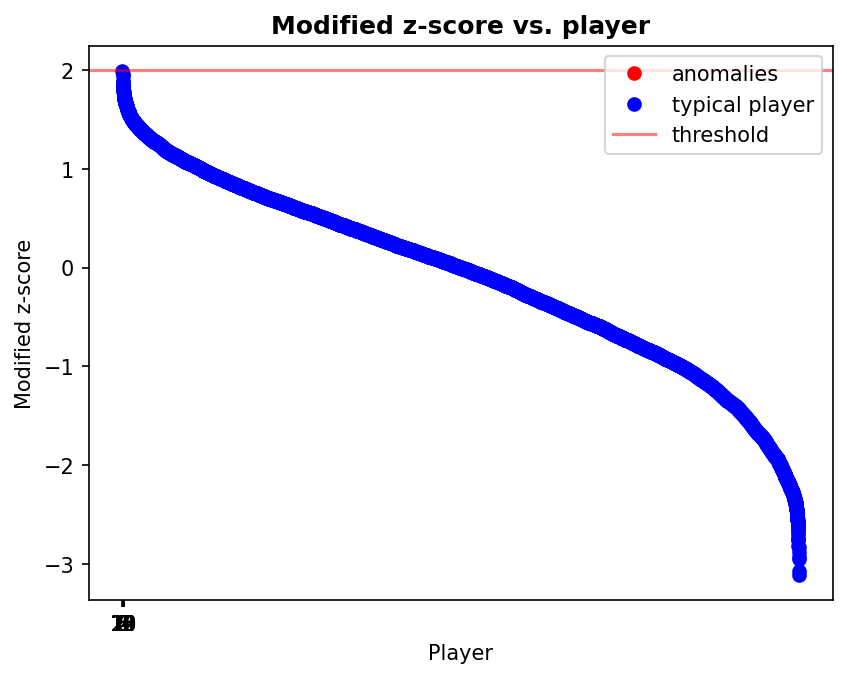

In [81]:
plot_anomaly_goals_2(top_goals['mod_zscore'], 2)

In [80]:
mod_zscore_anomalies_players = top_goals[(top_goals['mod_zscore'] > 2)]
mod_zscore_anomalies_players

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,zscore,mod_zscore


In [82]:
print('The value of MAD is {:.2f}'.format(mad_goals))

The value of MAD is 2.72


and  k∗MAD is 1.48, which is smaller than the standard deviation (2.05). 

We see that the anomalies have a larger effect on the standard deviation, which depends on the square of the deviation from the mean (MAD depends linearly on the deviation).

Of course, the data for top goal scorers is not normally distributed, so we can't associated probabilities with our scores, but our analysis does show the need to think about the scoring method used with the data.